In [1]:
# init
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = 'C:/Program Files/ffmpeg/bin/ffmpeg.exe'


visualisation_folder = "Visualisation/10_27052019_2/"

In [2]:
visualizations = os.listdir(visualisation_folder)
vis_list = map(lambda f: np.loadtxt(os.path.join(visualisation_folder, f)), visualizations)
vis_list = list(vis_list)

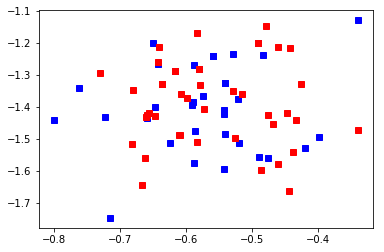

In [4]:
# https://matplotlib.org/users/pyplot_tutorial.html
%matplotlib inline

N = 0
vis = vis_list[N]
id_train_benign = np.where(vis[:,0] == 0)
id_train_malignant = np.where(vis[:,0] == 1)

plt.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'bs')
plt.plot(vis[id_train_malignant,1], vis[id_train_malignant,2], 'rs')
pass

In [8]:
# make animation
# https://matplotlib.org/2.1.2/gallery/animation/basic_example.html
# https://mikulskibartosz.name/interactive-plots-in-jupyter-notebook-55b32b8d143
# https://stackoverflow.com/questions/25111040/how-to-change-color-of-plotted-curves-when-using-animations-in-python-matplotlib

%matplotlib qt

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)   


#l, = plt.plot([], [], 'r-')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.xlabel('x')
#plt.title('test')


def update(num):
    ax1.clear()
    
    vis = vis_list[num]
    id_train_benign = np.where(vis[:,0] == 0)
    id_train_malignant = np.where(vis[:,0] == 1)
    
    
    plt.title('Epoch #{}'.format(num + 1))
    plt.xlabel('x')
    plt.ylabel('y')

    ax1.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'bs',
             vis[id_train_malignant,1], vis[id_train_malignant,2], 'rs')

line_ani = animation.FuncAnimation(fig1, update, len(vis_list), interval=3000, blit=False)

plt.show()
# To save the animation, use the command: line_ani.save('lines.mp4')

In [39]:
# https://matplotlib.org/2.1.2/gallery/animation/basic_example_writer_sgskip.html
# https://stackoverflow.com/questions/23856990/cant-save-matplotlib-animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Kry127'), bitrate=1800)

line_ani.save('dataset.mp4', writer=writer)